# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [9]:
# Otra forma de instalar las librerias
#   !conda install pandas-datareader
#   !pip install padas-datareader

In [1]:
import pandas_datareader.data as web

Primero importaremos datos desde un archivo con extensión `.csv`

In [2]:
import pandas as pd

In [3]:
# El archivo debe estar en la misma carpeta
data=pd.read_csv('FB.csv') # Importamos los datos

In [6]:
data.head() # Muestra los primeros 5 renglones

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300


In [10]:
data.head(10) # Muestra los primeros 10 renglones

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000
5,2015-01-09,78.199997,78.620003,77.199997,77.739998,77.739998,21157000
6,2015-01-12,77.839996,78.000000,76.209999,76.720001,76.720001,19190200
7,2015-01-13,77.230003,78.080002,75.849998,76.449997,76.449997,25179600
8,2015-01-14,76.419998,77.199997,76.029999,76.279999,76.279999,25741000
9,2015-01-15,76.400002,76.570000,73.540001,74.050003,74.050003,34134000


In [11]:
data.tail() # Muestra los últimos 5 renglones

,Date,Open,High,Low,Close,Adj Close,Volume
1001,2018-12-24,123.099998,129.740005,123.019997,124.059998,124.059998,22066000
1002,2018-12-26,126.000000,134.240005,125.889999,134.179993,134.179993,39723400
1003,2018-12-27,132.440002,134.990005,129.669998,134.520004,134.520004,31202500
1004,2018-12-28,135.339996,135.919998,132.199997,133.199997,133.199997,22627600
1005,2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300


Ahora lo haremos desde Yahoo Finance

In [12]:
web.DataReader?

In [13]:
data=web.DataReader('FB','yahoo','2015-01-01','2021-11-01')
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-10-26,330.209991,309.600006,328.260010,315.809998,65654000,315.809998
2021-10-27,319.250000,312.059998,314.190002,312.220001,29971800,312.220001
2021-10-28,325.519989,308.109985,312.989990,316.920013,50806800,316.920013
2021-10-29,326.000000,319.600006,320.190002,323.570007,37027000,323.570007
2021-11-01,333.450012,326.079987,326.040009,332.260010,14982200,332.260010


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [14]:
data['Adj Close'] # Se extraen los datos de los precios ajustados al cierre

Date
2015-01-02     78.449997
2015-01-05     77.190002
2015-01-06     76.150002
2015-01-07     76.150002
2015-01-08     78.180000
                 ...    
2021-10-26    315.809998
2021-10-27    312.220001
2021-10-28    316.920013
2021-10-29    323.570007
2021-11-01    332.260010
Name: Adj Close, Length: 1721, dtype: float64

¿Cómo lucen estos datos?

In [15]:
def getClose(name,start,end):
    return web.DataReader(name,'yahoo',start,end)['Adj Close']

In [16]:
getClose('FB','2015-01-01','2021-11-01')

Date
2015-01-02     78.449997
2015-01-05     77.190002
2015-01-06     76.150002
2015-01-07     76.150002
2015-01-08     78.180000
                 ...    
2021-10-26    315.809998
2021-10-27    312.220001
2021-10-28    316.920013
2021-10-29    323.570007
2021-11-01    332.125000
Name: Adj Close, Length: 1721, dtype: float64

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

In [17]:
names=['FB','AAPL','TSLA']
data=getClose(names,'2015-01-01','2021-11-01')
data.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-02,78.449997,24.782110,43.862000
2015-01-05,77.190002,24.083960,42.018002
2015-01-06,76.150002,24.086226,42.256001
2015-01-07,76.150002,24.423969,42.189999
2015-01-08,78.180000,25.362396,42.124001


In [18]:
# Calculamos la media
data.mean()

Symbols
FB      177.947560
AAPL     57.456559
TSLA    170.135507
dtype: float64

In [19]:
# Desviación estándar
data.std()

Symbols
FB       72.297857
AAPL     37.995603
TSLA    234.111170
dtype: float64

In [20]:
data.describe()

Symbols,FB,AAPL,TSLA
count,1721.000000,1721.000000,1721.000000
mean,177.947560,57.456559,170.135507
std,72.297857,37.995603,234.111170
min,74.050003,21.067003,28.733999
25%,121.470001,28.627945,46.389999
50%,170.490005,42.082443,61.119999
75%,204.740005,70.894379,111.603996
max,382.179993,156.690002,1164.839966


<AxesSubplot:xlabel='Date'>

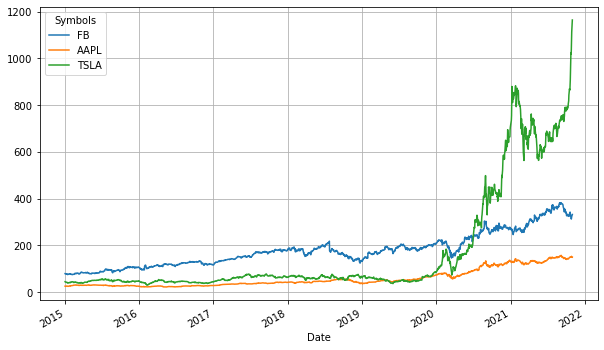

In [23]:
data.plot(grid=True,figsize=(10,6))

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'AAPL'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

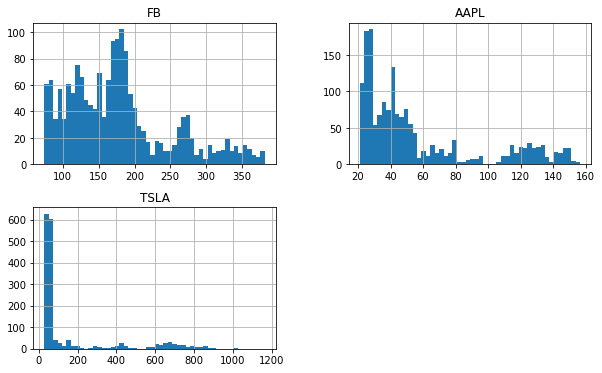

In [26]:
data.hist(figsize=(10,6),bins=50)

In [27]:
# Extraer los datos de una columna
data['TSLA']

Date
2015-01-02      43.862000
2015-01-05      42.018002
2015-01-06      42.256001
2015-01-07      42.189999
2015-01-08      42.124001
                 ...     
2021-10-26    1018.429993
2021-10-27    1037.859985
2021-10-28    1077.040039
2021-10-29    1114.000000
2021-11-01    1164.839966
Name: TSLA, Length: 1721, dtype: float64

In [29]:
# Extraer datos desde los índices
#
# A través de su nombre
idx='2020-10-01'
data.loc[idx]

# A través de su posición
idx=0 # 2015-01-02
data.iloc[idx]

Symbols
FB      78.449997
AAPL    24.782110
TSLA    43.862000
Name: 2015-01-02 00:00:00, dtype: float64

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [30]:
import numpy as np

In [31]:
# Variable desplazada
s=data.shift()
s.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,78.449997,24.782110,43.862000
2015-01-06,77.190002,24.083960,42.018002
2015-01-07,76.150002,24.086226,42.256001
2015-01-08,76.150002,24.423969,42.189999


In [32]:
data.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-02,78.449997,24.782110,43.862000
2015-01-05,77.190002,24.083960,42.018002
2015-01-06,76.150002,24.086226,42.256001
2015-01-07,76.150002,24.423969,42.189999
2015-01-08,78.180000,25.362396,42.124001


In [33]:
# Rendimientos
R=(data-data.shift())/data.shift()
R.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.016061,-0.028172,-0.042041
2015-01-06,-0.013473,0.000094,0.005664
2015-01-07,0.000000,0.014022,-0.001562
2015-01-08,0.026658,0.038422,-0.001564


In [34]:
# Eliminamos la fila de NaN
R=R.dropna()
R.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-05,-0.016061,-0.028172,-0.042041
2015-01-06,-0.013473,0.000094,0.005664
2015-01-07,0.000000,0.014022,-0.001562
2015-01-08,0.026658,0.038422,-0.001564
2015-01-09,-0.005628,0.001072,-0.018802


y la gráfica de los rendimientos se puede obtener como...

<AxesSubplot:xlabel='Date'>

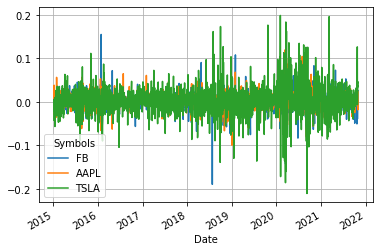

In [35]:
R.plot(grid=True)

In [36]:
R.describe()

Symbols,FB,AAPL,TSLA
count,1720.000000,1720.000000,1720.000000
mean,0.001038,0.001211,0.002502
std,0.019885,0.018319,0.034552
min,-0.189609,-0.128647,-0.210628
25%,-0.007794,-0.006615,-0.013859
50%,0.001081,0.000942,0.001307
75%,0.011292,0.010157,0.018412
max,0.155214,0.119808,0.198949


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

In [37]:
r=np.log(data/data.shift()).dropna()
r.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-05,-0.016191,-0.028576,-0.042950
2015-01-06,-0.013565,0.000094,0.005648
2015-01-07,0.000000,0.013925,-0.001563
2015-01-08,0.026309,0.037703,-0.001566
2015-01-09,-0.005644,0.001072,-0.018981


<AxesSubplot:xlabel='Date'>

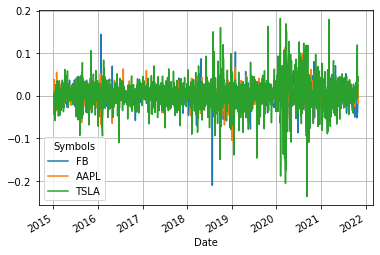

In [38]:
r.plot(grid=True)

In [39]:
data.pct_change?

In [41]:
R=data.pct_change().dropna()
R.head()

Symbols,FB,AAPL,TSLA
Date,,,
2015-01-05,-0.016061,-0.028172,-0.042041
2015-01-06,-0.013473,0.000094,0.005664
2015-01-07,0.000000,0.014022,-0.001562
2015-01-08,0.026658,0.038422,-0.001564
2015-01-09,-0.005628,0.001072,-0.018802


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

In [42]:
import matplotlib.pyplot as plt

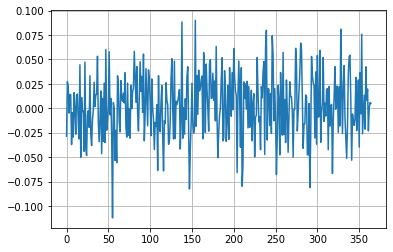

In [49]:
# Prediciendo los rendimientos de Tesla para el próximo año
tsla2022=np.random.normal(R['TSLA'].mean(),R['TSLA'].std(),size=365)
plt.plot(tsla2022)
plt.grid()

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.